In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly. express as px
from matplotlib.animation import FuncAnimation
%matplotlib inline

In [38]:
df = pd.read_csv('dataset.csv')

In [39]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [41]:
df.nunique()

VIN (1-10)                                             7548
County                                                  165
City                                                    629
State                                                    45
Postal Code                                             773
Model Year                                               20
Make                                                     34
Model                                                   114
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          101
Base MSRP                                                30
Legislative District                                     49
DOL Vehicle ID                                       112634
Vehicle Location                                        758
Electric Utility                                         73
2020 Census Tract                       

In [42]:
df.shape

(112634, 17)

In [43]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                            int64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [44]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112348.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.805604,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.700545,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [45]:
df.dropna()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500
5,5YJ3E1EB5J,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,475635324,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,53061051916
6,1N4AZ0CP4D,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,38.0,253546023,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,53061040900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112629,7SAYGDEF2N,King,Duvall,WA,98019,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,217955265,POINT (-121.98609 47.74068),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032401
112630,1N4BZ1CP7K,San Juan,Friday Harbor,WA,98250,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,40.0,103663227,POINT (-123.01648 48.53448),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,53055960301
112631,1FMCU0KZ4N,King,Vashon,WA,98070,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,34.0,193878387,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033027702
112632,KNDCD3LD4J,King,Covington,WA,98042,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,47.0,125039043,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032007


In [46]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [47]:
df = df.dropna()

In [48]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [49]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

# TASK - 1

## 1. Univariate Analysis: 

`Definition`
**Univariate analysis explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own. Descriptive statistics describe and summarize data.**


In `Univariate analysis`, we analyze each variable individually to understand its distribution, central tendency, and spread.
`Model Year`, `Make`, `County`, `City`

In [50]:
df['Model Year'].describe()

count    112152.000000
mean       2019.004494
std           2.891859
min        1997.000000
25%        2017.000000
50%        2020.000000
75%        2022.000000
max        2023.000000
Name: Model Year, dtype: float64

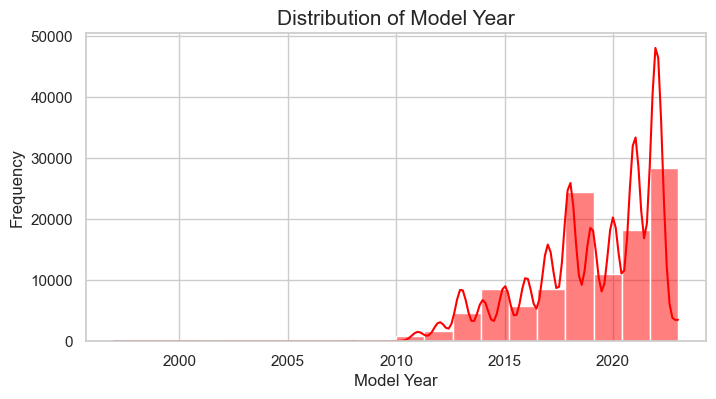

In [51]:
#  Histogram for 'Model Year'
plt.figure(figsize=(8, 4))
sns.histplot(df['Model Year'], bins=20, kde=True, color='red')
plt.title('Distribution of Model Year', fontsize=15)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

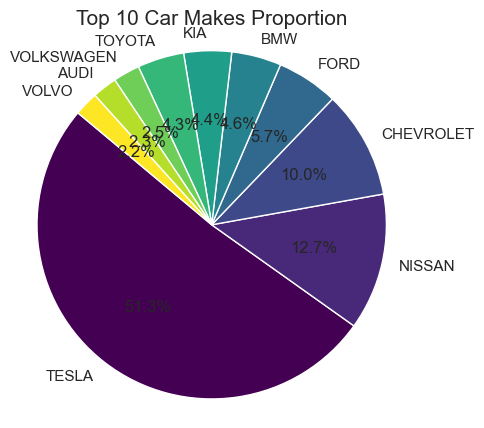

In [52]:
# Countplot for 'Make'
top_makes_counts = df['Make'].value_counts().head(10)

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(top_makes_counts, labels=top_makes_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(np.linspace(0, 1, len(top_makes_counts))))
plt.title('Top 10 Car Makes Proportion', fontsize=15)
plt.axis('equal')
plt.show()

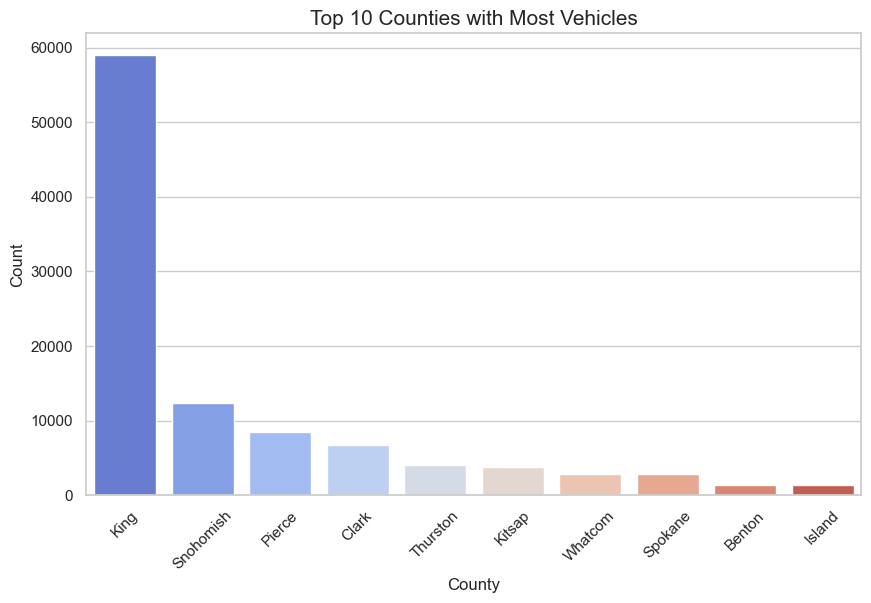

In [53]:
# Countplot for 'County'
top_counties = df['County'].value_counts().head(10)

# Create a figure for the histogram
plt.figure(figsize=(10, 6))
sns.barplot(x=top_counties.index, y=top_counties.values, palette='coolwarm')
plt.title('Top 10 Counties with Most Vehicles', fontsize=15)
plt.xlabel('County', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

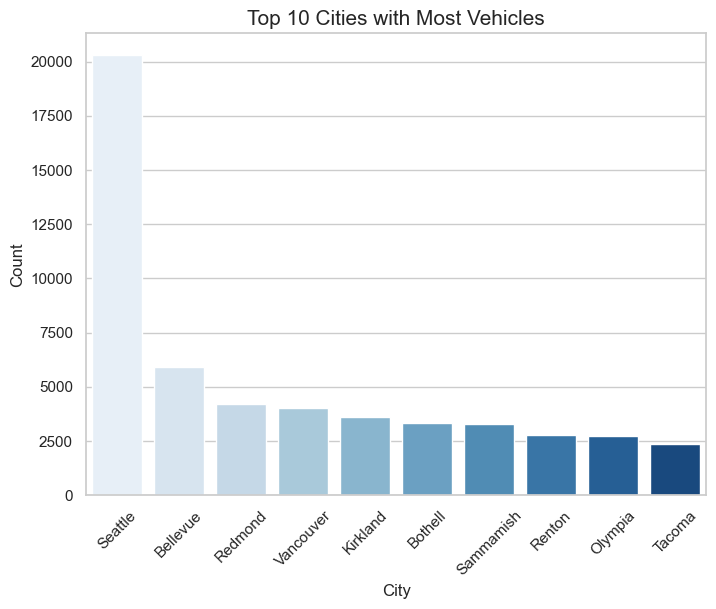

In [54]:
# Countplot for 'City'
plt.figure(figsize=(8, 6))
top_cities = df['City'].value_counts().head(10).index
sns.countplot(data=df[df['City'].isin(top_cities)], x='City', order=top_cities, palette='Blues')
plt.title('Top 10 Cities with Most Vehicles', fontsize=15)
plt.xlabel('City', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


# Bivariate analysis

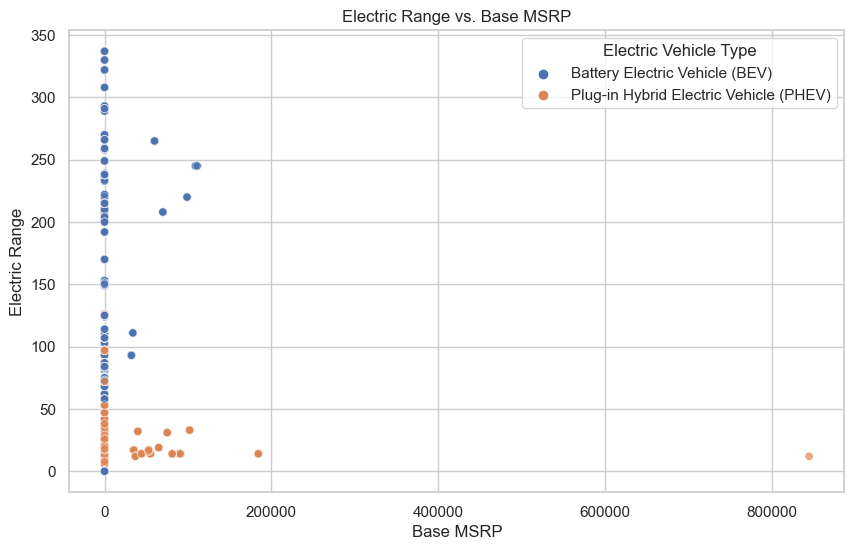

In [55]:
# Electric Range vs. Base MSRP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Base MSRP', y='Electric Range', hue='Electric Vehicle Type', alpha=0.7)
plt.title('Electric Range vs. Base MSRP')
plt.xlabel('Base MSRP')
plt.ylabel('Electric Range')
plt.legend(title='Electric Vehicle Type')
plt.show()



AttributeError: module 'matplotlib.pyplot' has no attribute 'xlabeal'

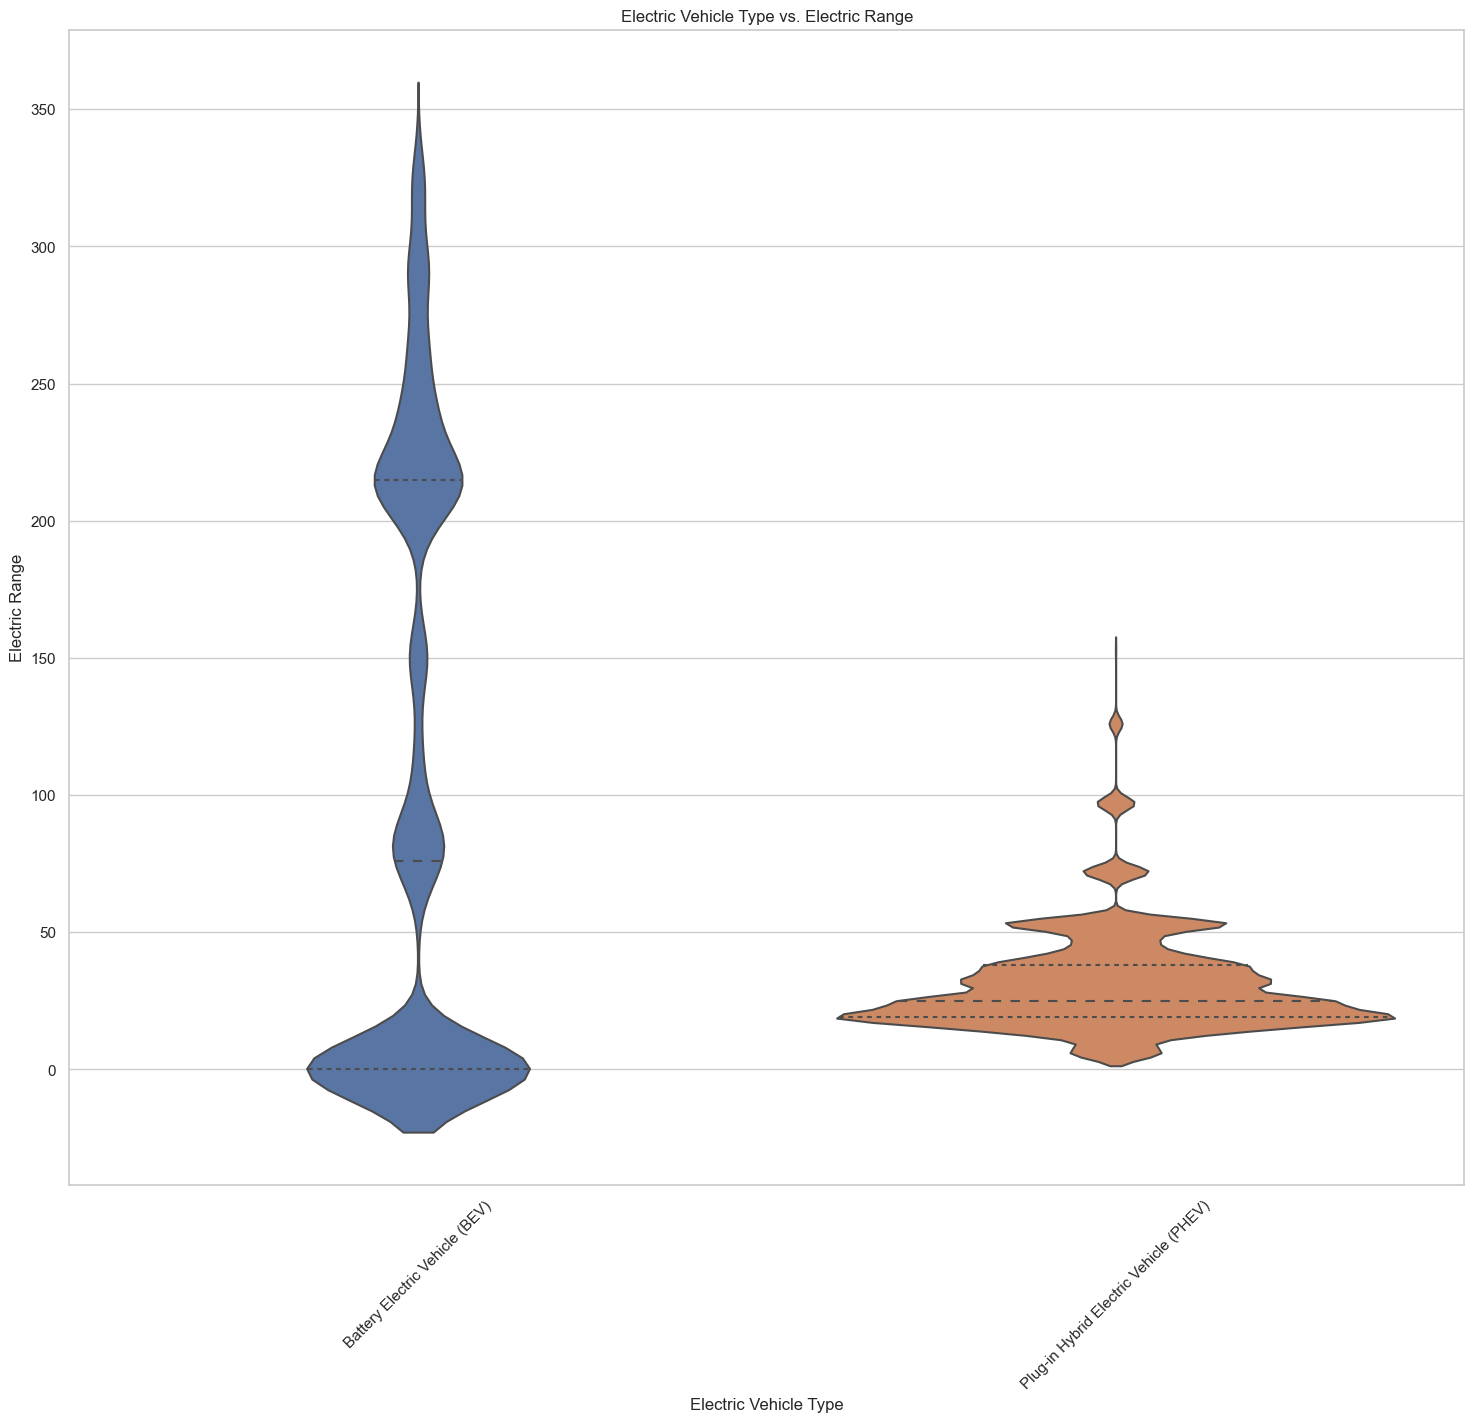

In [56]:
# Electric Vehicle Type vs. Electric Range
# Set the aesthetics for seaborn
sns.set(style="whitegrid")
# Create a violin plot for Electric Vehicle Type vs. Electric Range
plt.figure(figsize=(18, 15))
violin_plot = sns.violinplot(data=df, x='Electric Vehicle Type', y='Electric Range', inner="quartile")
# Set plot title and labels
plt.title('Electric Vehicle Type vs. Electric Range', fontsize=12)
plt.xticks(rotation=45)
plt.xlabeal('Electric Vehicle Type', fontsize=18)
plt.ylabel('Electric Range (miles)', fontsize=18)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Model Year vs. Base MSRP
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Model Year', y='Base MSRP', ci=None)
plt.title('Trend of Base MSRP Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Base MSRP')
plt.show()


# TASK - 2

### Creating Choropleth using plotly.express to display the number of EV vehicles based on location.

In [96]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112629,7SAYGDEF2N,King,Duvall,WA,98019,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,217955265,POINT (-121.98609 47.74068),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032401
112630,1N4BZ1CP7K,San Juan,Friday Harbor,WA,98250,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,40.0,103663227,POINT (-123.01648 48.53448),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,53055960301
112631,1FMCU0KZ4N,King,Vashon,WA,98070,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,34.0,193878387,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033027702
112632,KNDCD3LD4J,King,Covington,WA,98042,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,47.0,125039043,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032007


In [102]:
df['State'].value_counts()

WA    112348
CA        76
VA        36
MD        26
TX        14
CO         9
NV         8
GA         7
NC         7
CT         6
DC         6
FL         6
AZ         6
IL         6
SC         5
OR         5
NE         5
HI         4
UT         4
AR         4
NY         4
TN         3
KS         3
MO         3
PA         3
MA         3
LA         3
NJ         3
NH         2
OH         2
WY         2
ID         2
KY         1
RI         1
ME         1
MN         1
SD         1
WI         1
NM         1
AK         1
MS         1
AL         1
DE         1
OK         1
ND         1
Name: State, dtype: int64

In [100]:
import plotly.express as px

# Assuming your DataFrame is named 'df'

# Group the data by 'State' and count the number of EV vehicles
ev_count_by_state = df.groupby('State').size().reset_index(name='EV Count')

# Create the choropleth map
fig = px.choropleth(ev_count_by_state, locations="State", 
                    locationmode="USA-states", color="EV Count",
                    scope="usa",
                    color_continuous_scale="Viridis",
                    labels={"EV Count": "Number of EV Vehicles"})

# Show the map
fig.show()

# TASK - 3

### Create a Racing Bar Plot to display the animation of EV Make and its count each year. 

In [120]:
ev_make_counts = df[df['State'] == 'WA'].groupby(['Make', 'Model Year']).size().reset_index(name='Count')
fig = px.bar(
    ev_make_counts,
    y='Make',  
    x='Count',  
    color='Make',  
    animation_frame='Model Year',  
    orientation='h',  
    title='EV Makes and their Count Over the Years in Washington',
    labels={'Count': 'Number of EV Vehicles'},
    range_x=[0, 3000]
)
fig.update_traces(
    texttemplate='%{x}',  
    textposition='outside',  
    textfont_size=16
)

fig.update_layout(
    yaxis_title='Make', 
    xaxis_title='Number of EV Vehicles',
    width=1200,
    height=800   
)

fig.show()